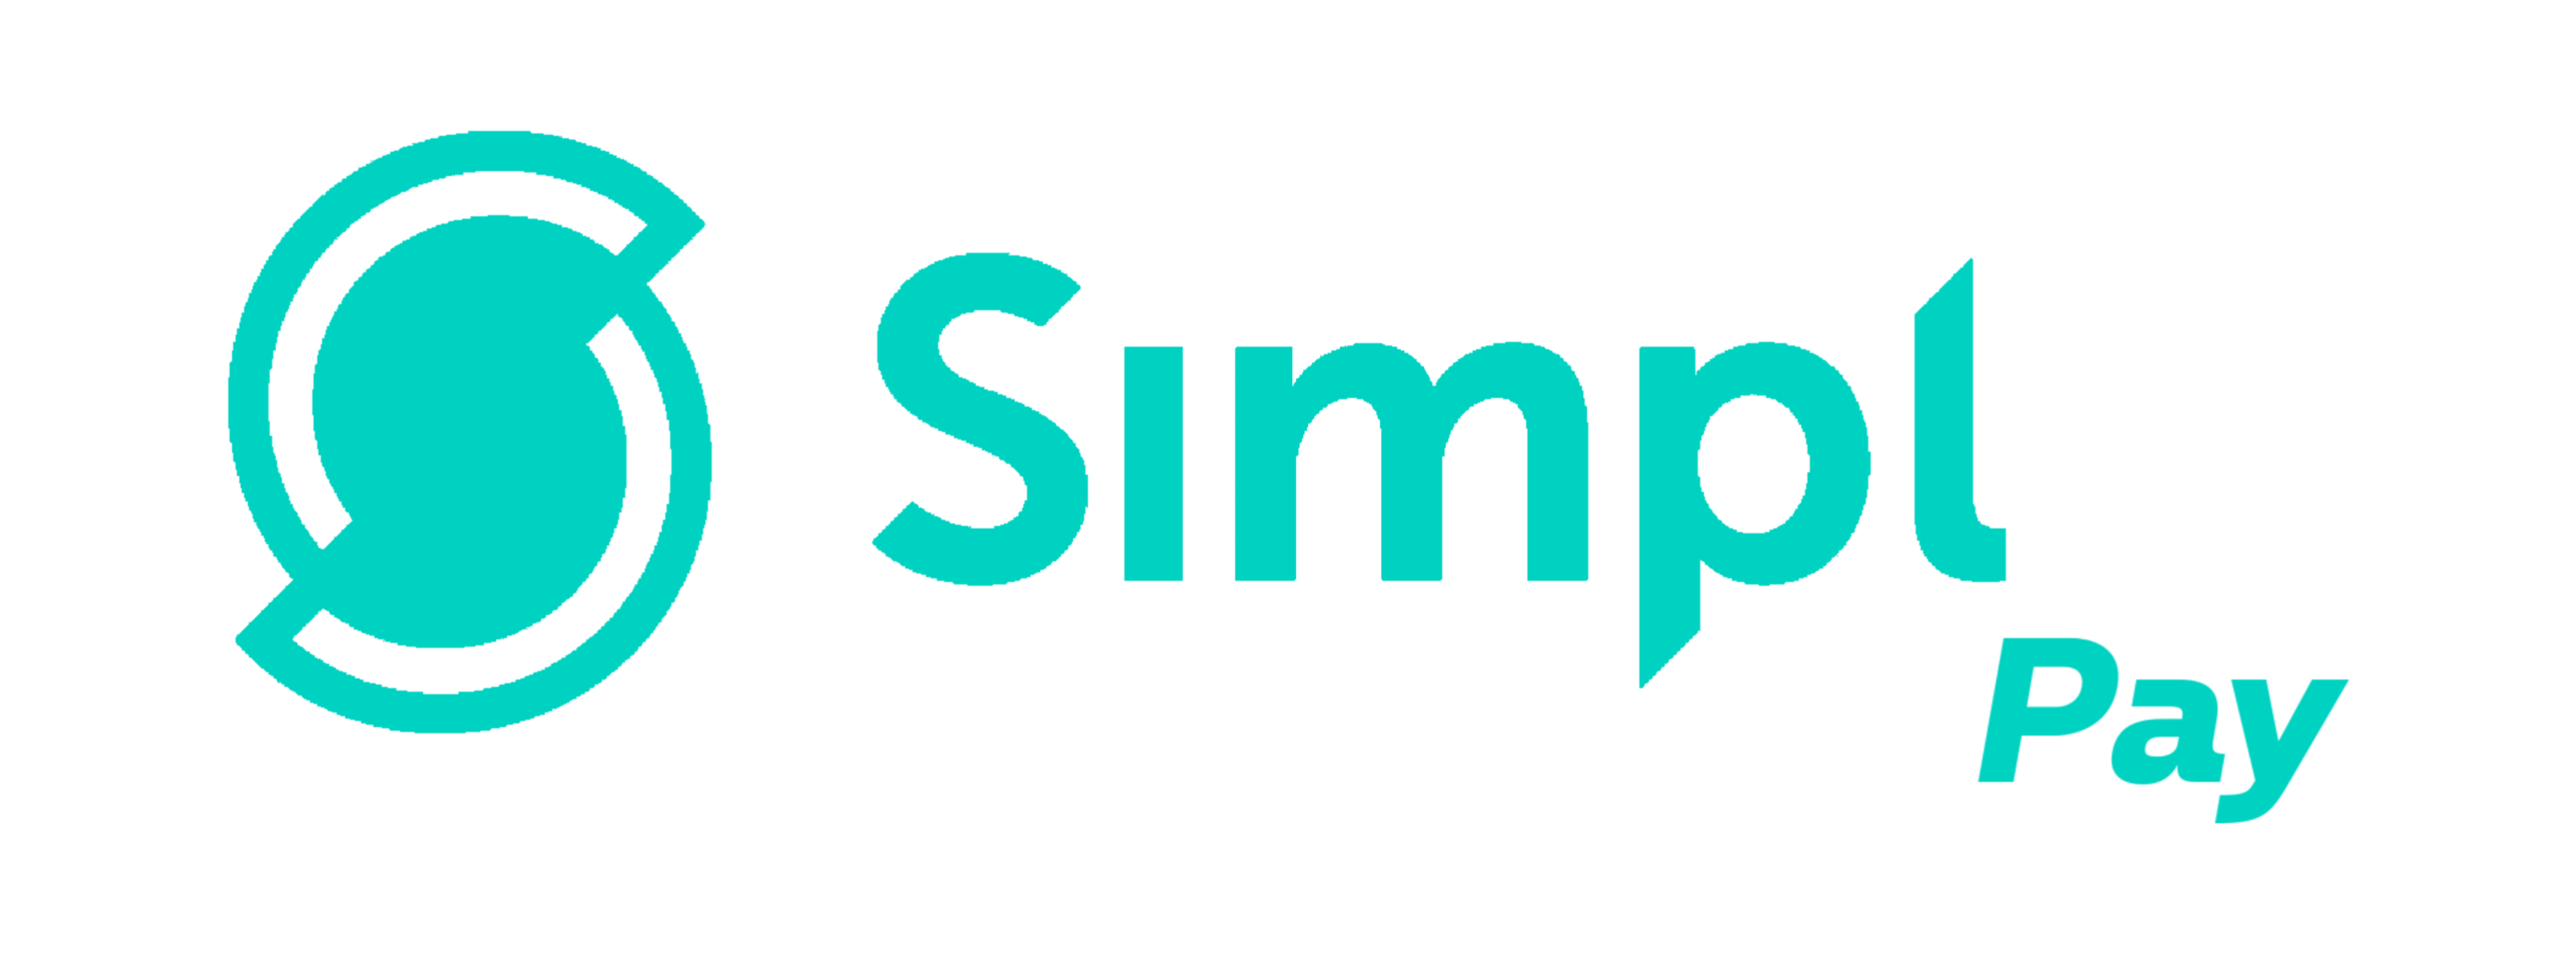

## Simpl Pay Online Payments Transaction Fraud Detection

### simpl pay e commerce online pay provider portal

#### Problem Statement

With the growth of e-commerce websites, people and financial companies rely on online services to carry out their transactions that have led to an exponential increase in the upi credit card online frauds. Fraudulent credit card upi transactions lead to a loss of huge amount of money. The design of an effective fraud detection system is necessary in order to reduce the losses incurred by the customers and financial companies.

**In this sense, in this project, we develop a Machine learning model(XGBoost) to detect credit card transaction fraud and implement it as a web service.**

##### Notebook By : PRASAD JADHAV

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Load Import Dataset

In [2]:
dataset = pd.read_csv('payments_fraud_dataset.csv')
dataset.shape

(6362620, 11)

In [4]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


#### About this Dataset.
##### Dataset Description :

- **Step** - represents a unit of time where 1 step equals 1 hour
- **Type** - type of Online Transaction
- **Amount** - the Amount of the Transaction
- **NameOrig** - Customer starting the Transaction
- **OldbalanceOrg** - Balance before the Transaction
- **NewbalanceOriG** - Balance after the Transaction
- **NameDest** - recipient of the Transaction
- **OldbalanceDest** - initial Balance of recipient before the Transaction
- **NewbalanceDest** - the new Balance of recipient after the Transaction
- **IsFraud** - Fraud Transaction

In [18]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [19]:
dataset.duplicated().sum()

0

In [20]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### EDA

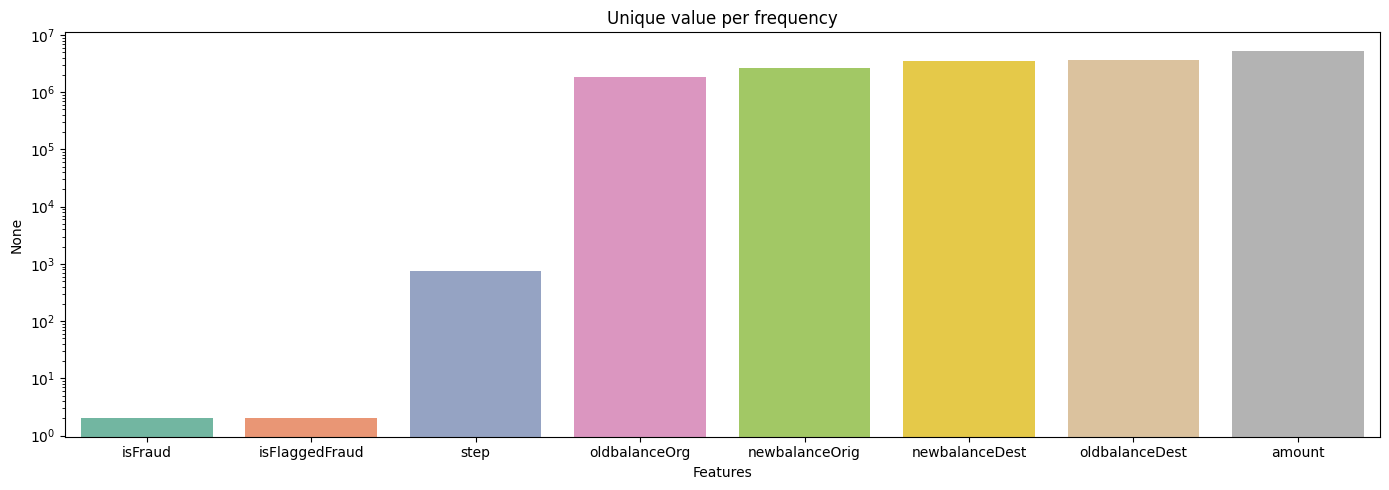

In [24]:
# Unique value - numerical variables
unique_value = dataset.select_dtypes("number").nunique().sort_values()

# bar Plot
fig, ax = plt.subplots(figsize = (14, 5))
sns.barplot(x = unique_value.index, y=unique_value, palette='Set2', ax=ax)
ax.set_yscale("log")
ax.set_xlabel("Features")
ax.set_title("Unique value per frequency")
plt.tight_layout();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


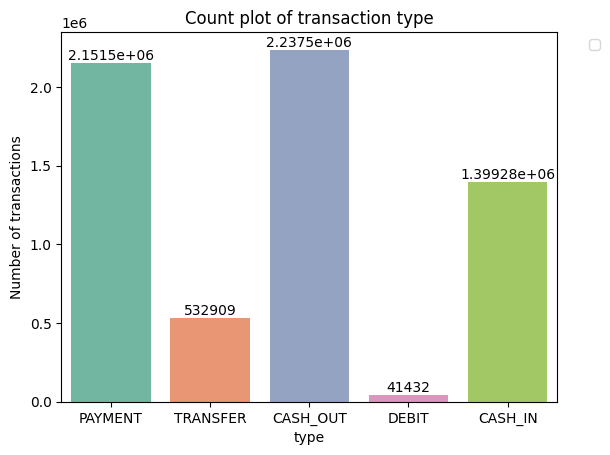

In [29]:
ax = sns.countplot(x='type', data=dataset, palette='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.show()

* **Cash out** is **the most numerous** transaction type, followed by payment, cash in, transfer and debit types.

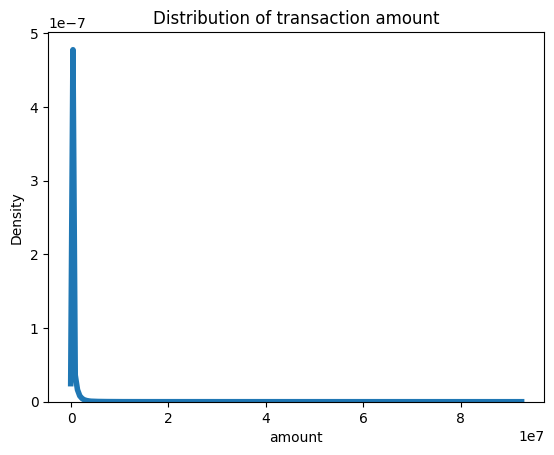

In [28]:
sns.kdeplot(dataset['amount'], linewidth=4)
plt.title('Distribution of transaction amount')
plt.show()

* The distribution of transaction amounts is **right skewed**. 
* This indicates that most values are clustered around the left tail of the distribution, with the longer right tail. 
* (mode < median < mean)

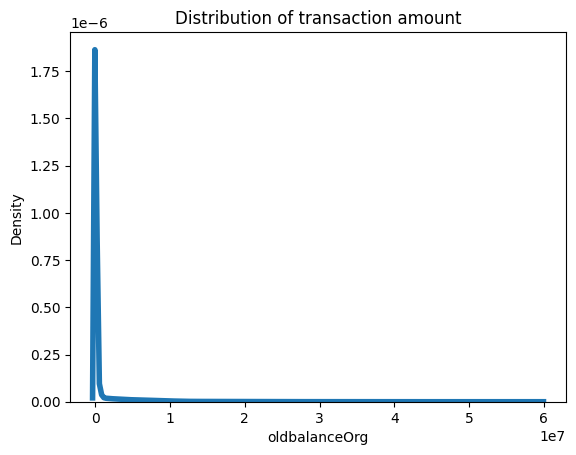

In [31]:
sns.kdeplot(dataset['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')
plt.show()

* The distribution of pre-transaction balances of the initial customers is **right skewed**.

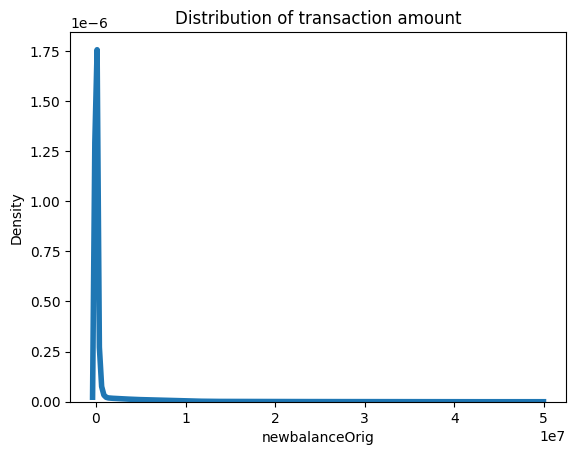

In [32]:
sns.kdeplot(dataset['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')
plt.show()

* The distribution of post-transaction balances of the initial customers is **right skewed**.

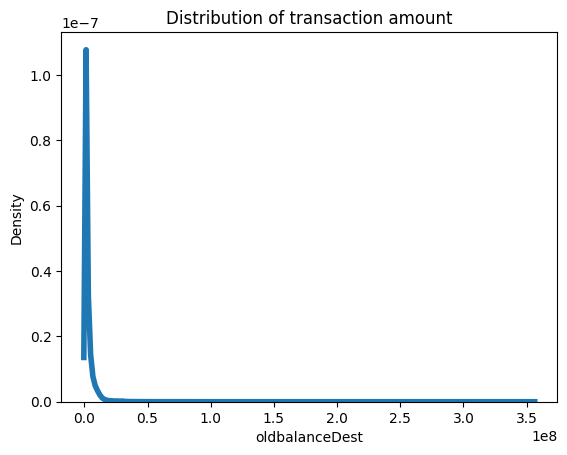

In [34]:
sns.kdeplot(dataset['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')
plt.show()

* The distribution of pre-transaction balances of the recipient is **right skewed**.

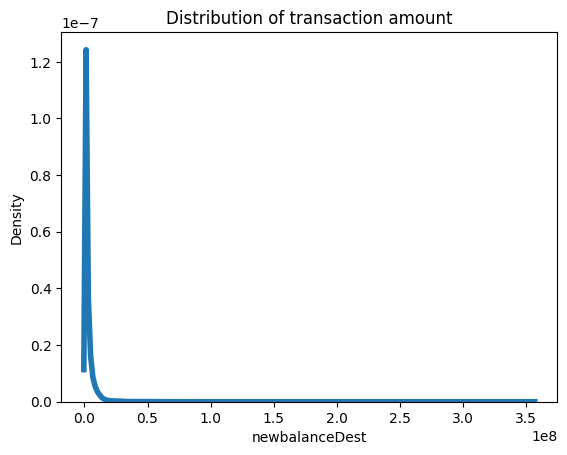

In [35]:
sns.kdeplot(dataset['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')
plt.show()

* The distribution of post-transaction balances of the recipient is **right skewed**.

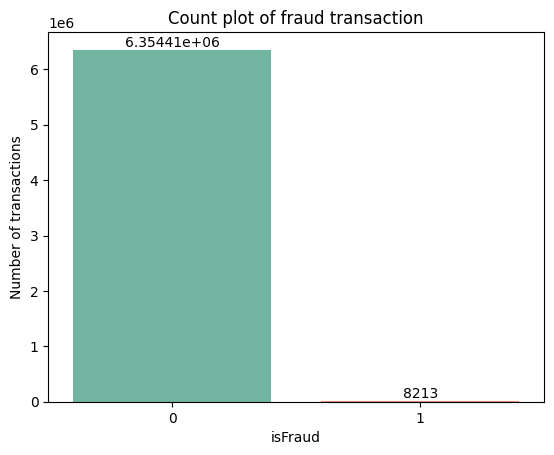

In [36]:
ax = sns.countplot(x='isFraud', data=dataset, palette='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

* There are much **more non-fraudulent transactions** than fraudulent transactions.

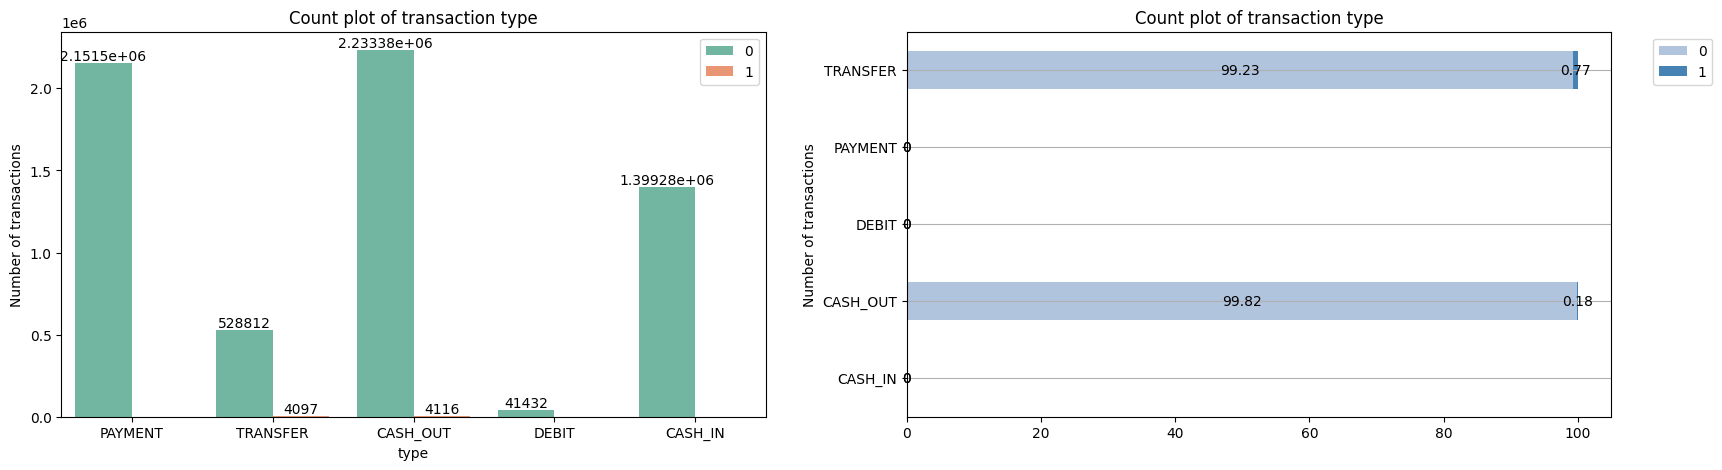

In [37]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=dataset, hue='isFraud', palette='Set2', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

dataset2 = dataset.groupby(['type', 'isFraud']).size().unstack()
dataset2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

* Fraudulent transactions only occur in debit and transfer types.

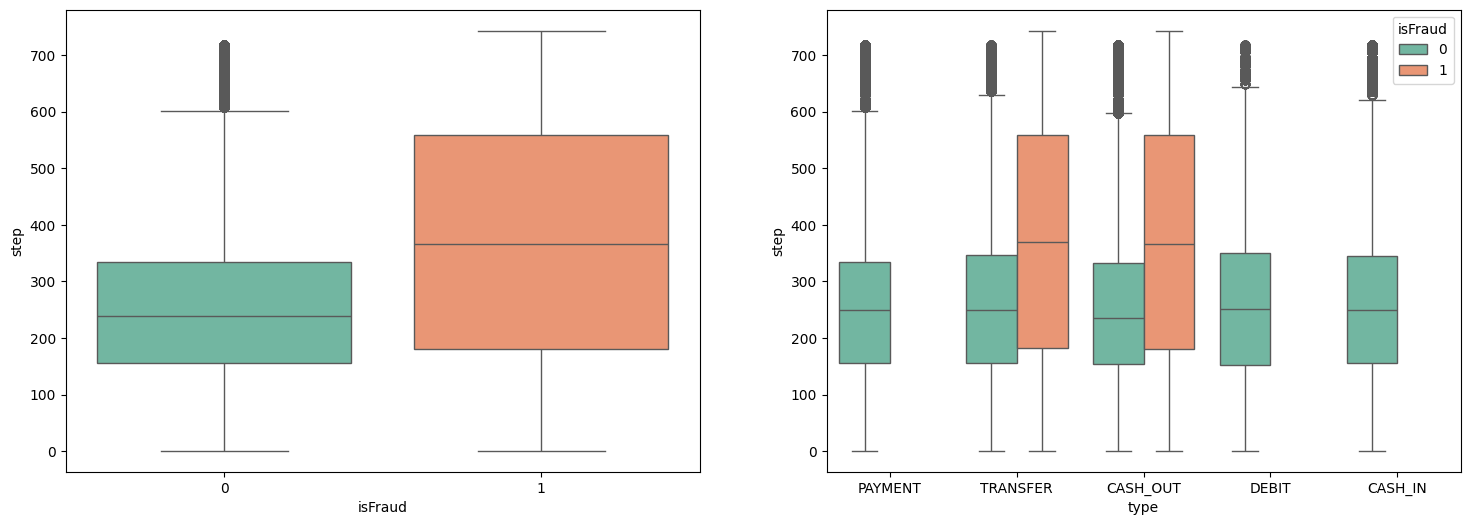

In [38]:
## Boxplot per step (time of transaction)
fig, ax = plt.subplots(1,2,figsize=(18,6))
ax.ravel()

## Fraud per amount of transactions
sns.boxplot(
    data = dataset,
    x = 'isFraud',
    y = 'step',
    palette = 'Set2',
    ax = ax[0]
)
## type of pay
sns.boxplot(
    data = dataset,
    x = 'type',
    y = 'step',
    hue = 'isFraud',
    palette = 'Set2',
    ax = ax[1]
);

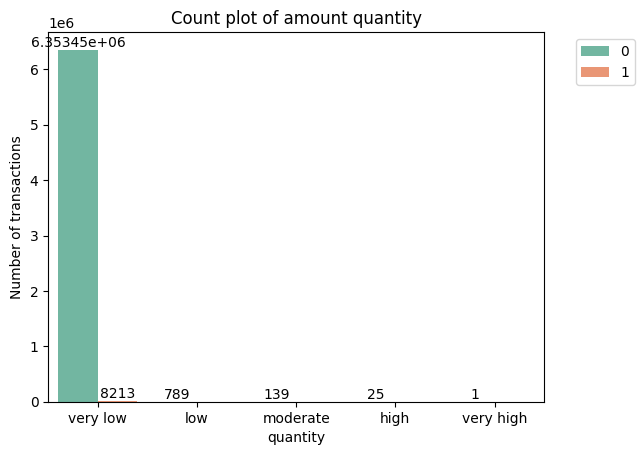

In [40]:
dataset['quantity'] = pd.cut(dataset['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=dataset, hue='isFraud', palette='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.show()

* All fraudulent transactions fall into the category of very low amounts. 
* This suggests that in most cases, small transactions are more prone to fraudulent transactions.

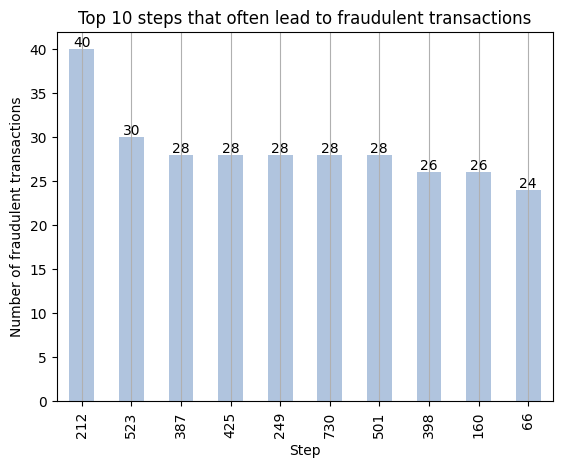

In [41]:
dataset1 = dataset[dataset['isFraud']==1]
dataset2 = dataset1['step'].value_counts().head(10)
ax = dataset2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, dataset2

* **Step 212** has the highest number of fraudulent transactions, 40 cases. 
* This indicates that Step 212 is the step that will most likely lead to fraudulent transactions.

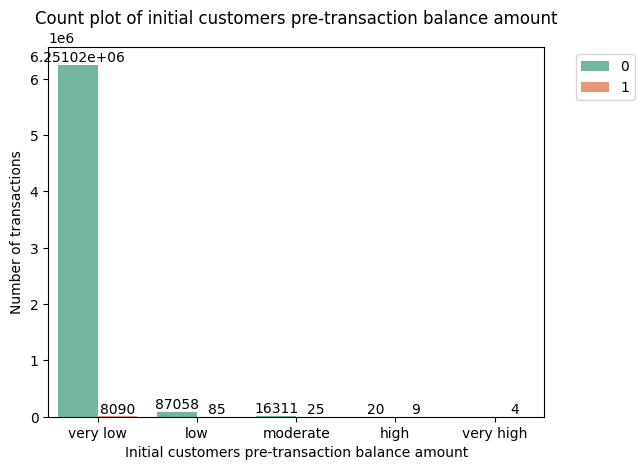

In [42]:
dataset['oldbalanceOrg_amt'] = pd.cut(dataset['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=dataset, hue='isFraud', palette='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')
plt.show()

* Initial customers with **very low pre-transaction balances** has the highest number of fraudulent transactions. 
* This means that initial customers with very low pre-transaction balances may be more likely to fall for a fraudulent transaction.

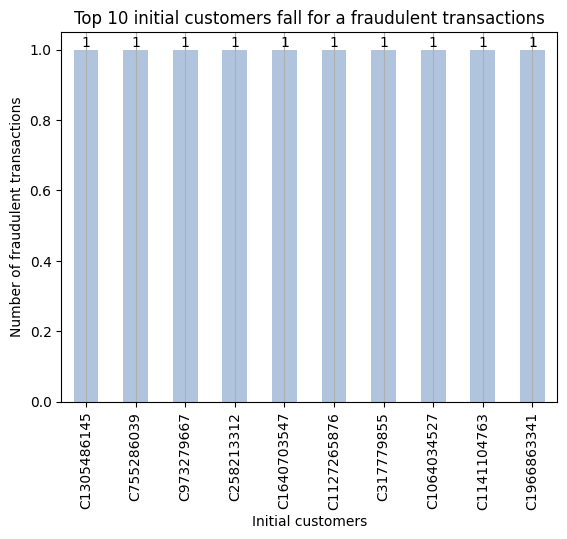

In [43]:
dataset2 = dataset1['nameOrig'].value_counts().head(10)
ax = dataset2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, dataset2

* Initial customers are scammed of **at most one** for a fraudulent transaction.

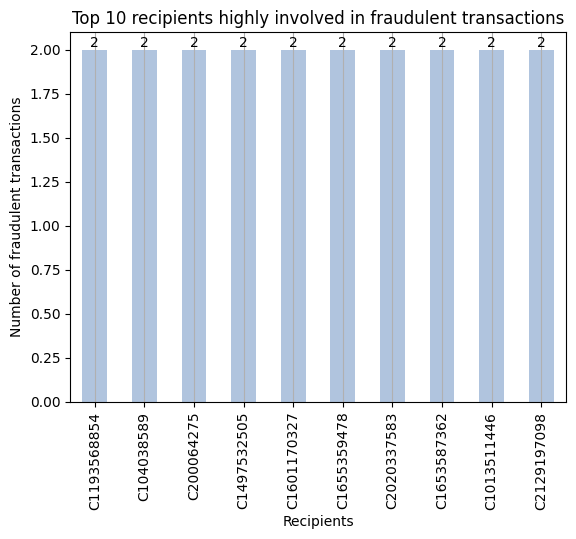

In [44]:
dataset2 = dataset1['nameDest'].value_counts().head(10)
ax = dataset2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, dataset2

* Suspicious recipients only have a **maximum of 2** involved fraudulent transactions.

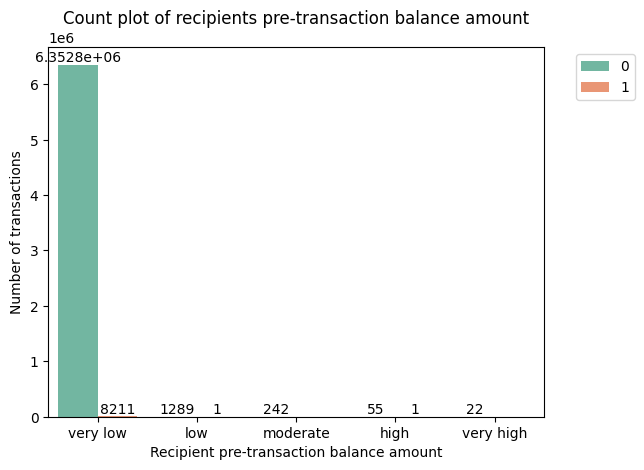

In [45]:
dataset['oldbalanceDest_amt'] = pd.cut(dataset['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=dataset, hue='isFraud', palette='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')
plt.show()

In [4]:
'''
from dython.nominal import associations

corr = associations(dataset)
'''

'\nfrom dython.nominal import associations\n\ncorr = associations(dataset)\n'

In [ ]:
'''
top_5_corr_corr = abs(corr['corr'][['ontime']].drop('ontime')).sort_values('ontime',ascending=False).head(5)

fig = plt.figure(figsize=(10,4),dpi=200)
top_5_corr.sort_values('ontime').plot(
    kind='barh',
    legend=None,
    color='#5874DC',
    ax=plt.gca()
)
plt.title('Top 5 Features that Have the Most Influence on Ontime')
plt.xlabel('Correlation Coefficient')
plt.show()
'''

In [6]:
dataset['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [7]:
dataset['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [17]:
'''
## Transform type variable 
type_dict = {
    
    'PAYMENT': 0,
    'TRANSFER': 1,
    'CASH_OUT': 2,
    'DEBIT': 3,
    'CASH_IN': 4
}
dataset['type'] = dataset['type'].map(type_dict)
'''

"\n## Transform type variable \ntype_dict = {\n    \n    'PAYMENT': 0,\n    'TRANSFER': 1,\n    'CASH_OUT': 2,\n    'DEBIT': 3,\n    'CASH_IN': 4\n}\ndataset['type'] = dataset['type'].map(type_dict)\n"

In [32]:
'''
from sklearn.preprocessing import OrdinalEncoder

# Define the columns to select
c_cols = [x for x in dataset.columns if dataset[x].dtypes=='object']

# Select the columns
cc = dataset.loc[:, c_cols]

# Initialize the encoder
encoder = OrdinalEncoder()

# Fit and transform the selected columns
encoded_array = encoder.fit_transform(cc)

# Convert the array back to a DataFrame
df = pd.DataFrame(encoded_array, columns=c_cols).astype('int64')

# Display the first few rows of the encoded DataFrame
print(df.head())
'''

   type  nameOrig  nameDest
0     3    757869   1662094
1     3   2188998   1733924
2     4   1002156    439685
3     1   5828262    391696
4     3   3445981    828919


In [4]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# c_cols = [x for x in dataset.columns if dataset[x].dtypes=='object']

In [3]:
# Data Preprocessing
cols = ['nameOrig', 'nameDest', 'isFlaggedFraud']
df = dataset.drop(cols, axis=1)
df['type'] = dataset['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [7]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,0,11668.14,41554.0,29885.86,0.0,0.0,0


In [12]:
# Imbalanced Dataset Column
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

### Experiment Tracking > Model > Validation > Development > Validation > Prediction

#### Preprocessing and Training the Model

In [15]:
# Make X and y
X = df.drop(columns='isFraud', axis=1)
y = df['isFraud']

# split X y to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm =confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))

[[1906255      96]
 [    352    2083]]
accuracy: 0.9997652958477273
precision: 0.9559430931620009
recall: 0.8554414784394251


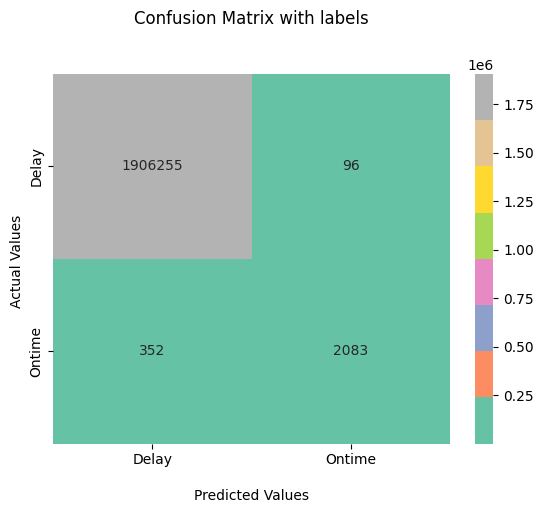

In [18]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Set2')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels 
ax.xaxis.set_ticklabels(['Delay','Ontime'])
ax.yaxis.set_ticklabels(['Delay','Ontime'])

# Display the visualization of the Confusion Matrix.
ax

# Show
plt.show()

#### Evaluate Model Matrix

In [19]:
# Let's try with some other parameters than default parameters if the result becomes better.

model_2 = XGBClassifier(n_estimators=1500, learning_rate=0.05, n_jobs=4)
model_2.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

y_pred_2 = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_2= confusion_matrix(y_test, y_pred_2)
cm_2

# Ok the same result. Maybe parameter tuning does not go further.

array([[1906255,      96],
       [    352,    2083]], dtype=int64)

#### Bias-Variance Trade Off

In [22]:
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBClassifier with default hyperparameters
model = XGBClassifier(n_estimators=1500, learning_rate=0.05, n_jobs=-1)
model.fit(X_train, y_train)

# Evaluate the model on the training set
train_preds = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)

# Evaluate the model on the testing set
test_preds = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.93


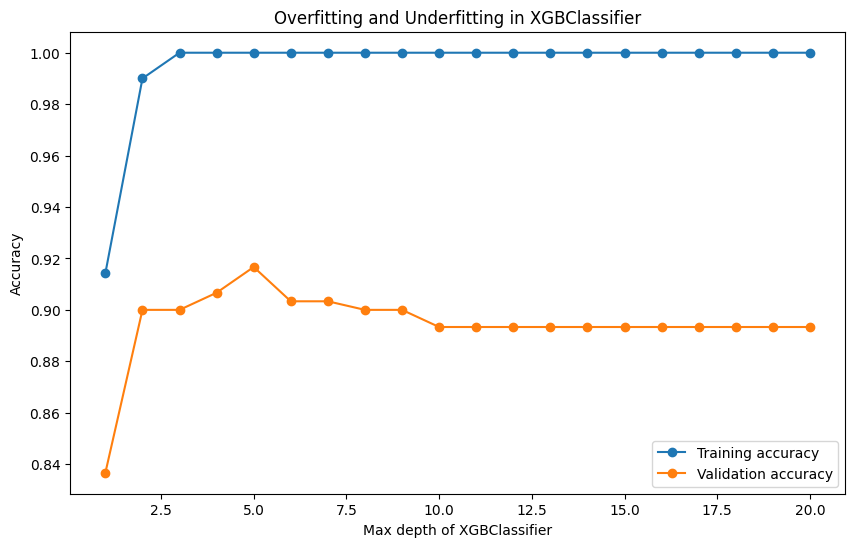

In [23]:
from sklearn.datasets import make_classification

# Generating a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot overfitting and underfitting
def plot_overfitting_underfitting(X_train, y_train, X_test, y_test):
    train_accuracies = []
    test_accuracies = []
    max_depths = list(range(1, 21))
    
    for max_depth in max_depths:
        model = XGBClassifier(max_depth=max_depth, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    plt.figure(figsize=(10, 6))
    plt.plot(max_depths, train_accuracies, label='Training accuracy', marker='o')
    plt.plot(max_depths, test_accuracies, label='Validation accuracy', marker='o')
    plt.xlabel('Max depth of XGBClassifier')
    plt.ylabel('Accuracy')
    plt.title('Overfitting and Underfitting in XGBClassifier')
    plt.legend()
    plt.show()

# Plotting
plot_overfitting_underfitting(X_train, y_train, X_test, y_test)

### ***Imbalanced Data Handling***

In [26]:
# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res,y_res = smote.fit_resample(X,y)

In [27]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
base_model = XGBClassifier(n_estimators=1500, learning_rate=0.05, n_jobs=4)
base_model.fit(X_train, y_train)

# Evaluate the model on the training set
train_preds = base_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)

# Evaluate the model on the testing set
test_preds = base_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.95


In [31]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Define the model
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

# Define the parameter grid
param_grid = {
    'eta': [0.01, 0.03, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1,n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

# Predict on the test data
y_pred = best_model.predict(X_test)

# Calculate and display the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Classification Report:\n{report}")

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'colsample_bytree': 0.9, 'eta': 0.1, 'gamma': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'subsample': 0.8}
Accuracy: 0.9154228855721394
Precision: 0.875
Recall: 0.9438202247191011
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       112
           1       0.88      0.94      0.91        89

    accuracy                           0.92       201
   macro avg       0.91      0.92      0.91       201
weighted avg       0.92      0.92      0.92       201



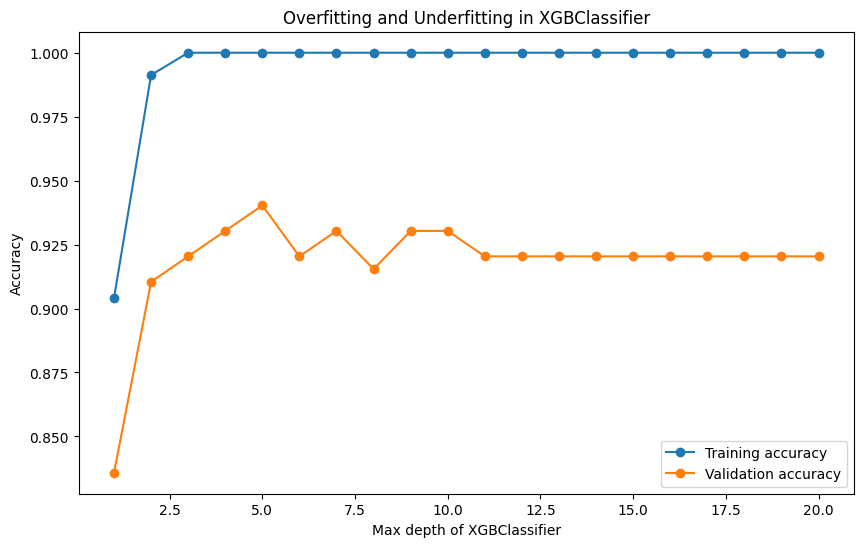

In [33]:
def plot_overfitting_underfitting(X_train, y_train, X_test, y_test):
    train_accuracies = []
    test_accuracies = []
    max_depths = list(range(1, 21))
    
    for max_depth in max_depths:
        model = XGBClassifier(max_depth=max_depth, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    plt.figure(figsize=(10, 6))
    plt.plot(max_depths, train_accuracies, label='Training accuracy', marker='o')
    plt.plot(max_depths, test_accuracies, label='Validation accuracy', marker='o')
    plt.xlabel('Max depth of XGBClassifier')
    plt.ylabel('Accuracy')
    plt.title('Overfitting and Underfitting in XGBClassifier')
    plt.legend()
    plt.show()

# Plotting
plot_overfitting_underfitting(X_train, y_train, X_test, y_test)

In [58]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay

X = df.drop(columns='isFraud', axis=1)
y = df['isFraud']

# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)


def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))
        
        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        
        for score in scoring:
            scores = cross_val_score(model, X, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))
            
        print('\n')

In [61]:
classifiers = { 'DecisionTree Classifier':DecisionTreeClassifier(class_weight='balanced', random_state=27),
                'RandomForest Classifier': RandomForestClassifier(class_weight='balanced', random_state=27),
               'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=27),
               'Cat Boost Classifier': CatBoostClassifier(random_state=27),
               'LGBM Classifier': LGBMClassifier(class_weight='balanced', random_state=27)
              }

In [62]:
model_comparison_evaluate(classifiers, X_train, y_train)

K-Fold Cross-Validation:

DecisionTree Classifier:
Mean accuracy score: 0.991 (0.002)
Mean precision score: 0.990 (0.002)
Mean recall score: 0.992 (0.002)
Mean f1 score: 0.991 (0.002)
Mean roc_auc score: 0.991 (0.002)


RandomForest Classifier:
Mean accuracy score: 0.992 (0.002)
Mean precision score: 0.988 (0.005)
Mean recall score: 0.996 (0.001)
Mean f1 score: 0.992 (0.002)
Mean roc_auc score: 0.999 (0.000)


Gradient Boosting Classifier:
Mean accuracy score: 0.989 (0.002)
Mean precision score: 0.982 (0.004)
Mean recall score: 0.996 (0.001)
Mean f1 score: 0.989 (0.002)
Mean roc_auc score: 0.998 (0.001)


Cat Boost Classifier:
Mean accuracy score: 0.994 (0.002)
Mean precision score: 0.990 (0.003)
Mean recall score: 0.997 (0.001)
Mean f1 score: 0.994 (0.002)
Mean roc_auc score: 1.000 (0.000)


LGBM Classifier:
Mean accuracy score: 0.995 (0.001)
Mean precision score: 0.993 (0.002)
Mean recall score: 0.998 (0.001)
Mean f1 score: 0.995 (0.001)
Mean roc_auc score: 1.000 (0.000)




XG Boost Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       0.99      1.00      0.99   1258200
    Fraud [1]       1.00      0.11      0.21     14324

     accuracy                           0.99   1272524
    macro avg       0.99      0.56      0.60   1272524
 weighted avg       0.99      0.99      0.99   1272524
 



Text(0.5, 0, 'False Positive Rate')

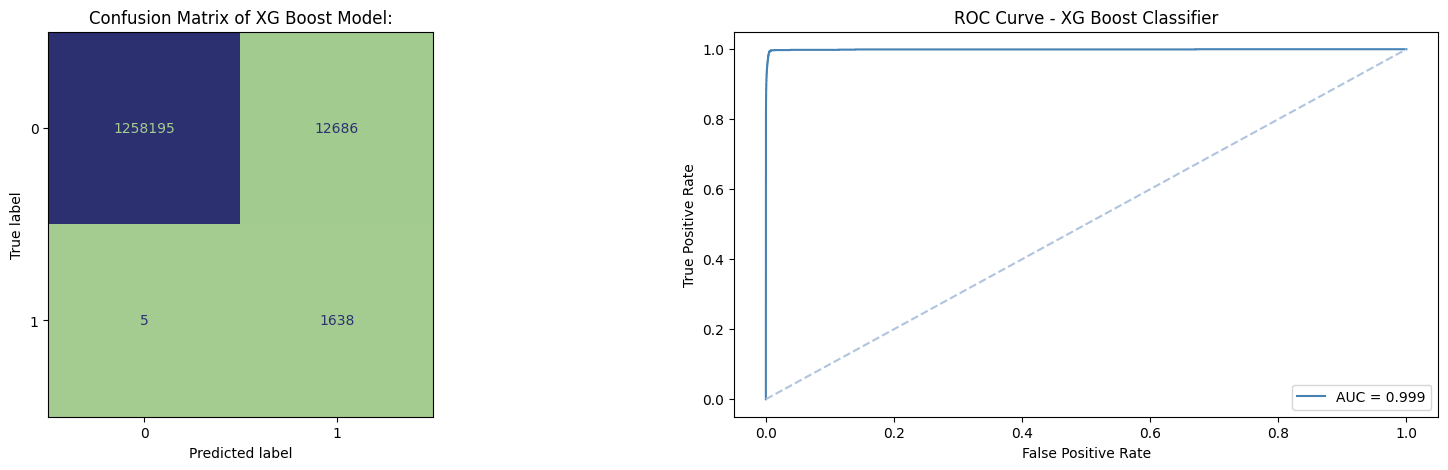

In [66]:
model = XGBClassifier(class_weight='balanced', random_state=27)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:,1]
print('XG Boost Classifier:')
print(classification_report(y_pred, y_test, labels=[0,1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')



fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of XG Boost Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)                       
ax[1].set_title('ROC Curve - XG Boost Classifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

## Imbalanced Dataset Handling Techniqs

In [85]:
"""
# Make X and y
X_r = df.drop(columns='isFraud', axis=1)
y_r = df['isFraud']

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res,y_res = smote.fit_resample(X_r,y_r)

from sklearn.datasets import make_classification

# Generate synthetic data
X_r, y_r = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Scaleing
r_scaler = StandardScaler()
X_train_res = r_scaler.fit_transform(X_train_res)
X_test_res = r_scaler.fit_transform(X_test_res)

# Train an XGBClassifier with default hyperparameters
r_model = XGBClassifier(n_estimators=1500, learning_rate=0.05, n_jobs=-1)
r_model.fit(X_train_res, y_train_res)

# Evaluate the model on the training set
r_train_preds = model.predict(X_train_res)
r_train_accuracy = accuracy_score(y_train_res, r_train_preds)

# Evaluate the model on the testing set
r_test_preds = model.predict(X_test_res)
r_test_accuracy = accuracy_score(y_test_res, r_test_preds)

print(f"Training Accuracy: {r_train_accuracy:.2f}")
print(f"Testing Accuracy: {r_test_accuracy:.2f}")
"""

'\n# Make X and y\nX_r = df.drop(columns=\'isFraud\', axis=1)\ny_r = df[\'isFraud\']\n\n# Imbalanced Data Handling\nfrom imblearn.over_sampling import SMOTE\nsmote = SMOTE(random_state=42)\nX_res,y_res = smote.fit_resample(X_r,y_r)\n\nfrom sklearn.datasets import make_classification\n\n# Generate synthetic data\nX_r, y_r = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)\n\n# Split the data into training and testing sets\nX_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)\n\n# Train an XGBClassifier with default hyperparameters\nmodel = XGBClassifier(n_estimators=1500, learning_rate=0.05, n_jobs=-1)\nmodel.fit(X_train_res, y_train_res)\n\n# Evaluate the model on the training set\nr_train_preds = model.predict(X_train_res)\nr_train_accuracy = accuracy_score(y_train_res, r_train_preds)\n\n# Evaluate the model on the testing set\nr_test_preds = model.predict(X_test_res)\nr_test

### Experiment Tracking

In [5]:
X_r = df.drop(columns='isFraud', axis=1)
y_r = df['isFraud']

In [6]:
y_r.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [7]:
# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res,y_res = smote.fit_resample(X_r,y_r)

In [8]:
y_res.value_counts()

isFraud
0    6354407
1    6354407
Name: count, dtype: int64

In [9]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [10]:
y_train_res.value_counts()

isFraud
0    5083570
1    5083481
Name: count, dtype: int64

In [11]:
y_test_res.value_counts()

isFraud
1    1270926
0    1270837
Name: count, dtype: int64

In [31]:
r_base_model = XGBClassifier()
r_base_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
# Evaluate the model on the training set
train_preds_r = r_base_model.predict(X_train_res)
train_accuracy_r = accuracy_score(y_train_res, train_preds_r)

In [33]:
# Evaluate the model on the testing set
test_preds_r = r_base_model.predict(X_test_res)
test_accuracy_r = accuracy_score(y_test_res, test_preds_r)

In [34]:
print(f"Training Accuracy: {train_accuracy_r:.2f}")
print(f"Testing Accuracy: {test_accuracy_r:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 1.00


- **Overfitting**: High training accuracy and significantly lower testing accuracy.
- **Underfitting**: Both training and testing accuracy are low and similar.

In [22]:
"""
# from sklearn.model_selection import learning_curve

# Define the model
r_base_model = XGBClassifier(n_jobs=-1)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=r_base_model,
    X=X_train_res,
    y=y_train_res,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Generate 10 points from 10% to 100% of the training data
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)

# Calculate mean and standard deviation of training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")

# Plot training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot testing scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.grid()
plt.show()

# Evaluate the model on the training set
train_preds_r = r_base_model.fit(X_train_res, y_train_res).predict(X_train_res)
train_accuracy_r = accuracy_score(y_train_res, train_preds_r)

# Evaluate the model on the testing set
test_preds_r = r_base_model.predict(X_test_res)
test_accuracy_r = accuracy_score(y_test_res, test_preds_r)

print(f"Training Accuracy: {train_accuracy_r:.2f}")
print(f"Testing Accuracy: {test_accuracy_r:.2f}")
"""


KeyboardInterrupt



##### Model Dump and Prediction

In [38]:
import pickle
pickle.dump(base_model,open('fraud_predictor.pkl','wb'))
model = pickle.load(open('fraud_predictor.pkl','rb'))

In [23]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,0,11668.14,41554.0,29885.86,0.0,0.0,0


#### Model Validation

In [47]:
print('Enter The Transaction Details')

step = int(input('Enter the Step: '))
payment_type = int(input('Enter the Payment Type: '))
amount = float(input('Enter the Amount: '))
oldbalance_org = float(input('Enter the Old Balance Org: '))
newbalance_orig = float(input('Enter the New Balance Orig: '))
oldbalance_dest = float(input('Enter the Old Balance Dest: '))
newbalance_dest = float(input('Enter the New Balance Dest: '))

input_point = np.array([[step, payment_type, amount, oldbalance_org, newbalance_orig, oldbalance_dest, newbalance_dest]])

prediction = r_base_model.predict(input_point)

if prediction[0] == 0:
    print('Non-Fraud [0]')
else:
    print('Fraud [1]')

Enter The Transaction Details
Enter the Step: 1
Enter the Payment Type: 3
Enter the Amount: 181
Enter the Old Balance Org: 181
Enter the New Balance Orig: 0
Enter the Old Balance Dest: 21182
Enter the New Balance Dest: 0
Fraud [1]


In [44]:
X = df.drop(columns='isFraud', axis=1)
y = df['isFraud']

from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBClassifier with default hyperparameters
x_model = XGBClassifier(n_estimators=1500, learning_rate=0.05, n_jobs=-1)
x_model.fit(X_train, y_train)

# Evaluate the model on the training set
train_preds = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)

# Evaluate the model on the testing set
test_preds = x_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.43
Testing Accuracy: 0.93


In [48]:
import pickle
pickle.dump(r_base_model,open('pay_fraud_predictor.pkl','wb'))
r_model = pickle.load(open('pay_fraud_predictor.pkl','rb'))

In [50]:
print('Enter The Transaction Details')

step = int(input('Enter the Step: '))
payment_type = int(input('Enter the Payment Type: '))
amount = float(input('Enter the Amount: '))
oldbalance_org = float(input('Enter the Old Balance Org: '))
newbalance_orig = float(input('Enter the New Balance Orig: '))
oldbalance_dest = float(input('Enter the Old Balance Dest: '))
newbalance_dest = float(input('Enter the New Balance Dest: '))

input_point = np.array([[step, payment_type, amount, oldbalance_org, newbalance_orig, oldbalance_dest, newbalance_dest]])

prediction = r_model.predict(input_point)

if prediction[0] == 0:
    print('Your Transaction is Non-Frauded ✔️ (Authorised)')
else:
    print('Your Transaction is Frauded ✖️ (Unauthorised)')

Enter The Transaction Details
Enter the Step: 1
Enter the Payment Type: 3
Enter the Amount: 181
Enter the Old Balance Org: 181
Enter the New Balance Orig: 0
Enter the Old Balance Dest: 21182
Enter the New Balance Dest: 0
Your Transaction is Frauded ✖️ (Unauthorised)


##### Thank You!